In [22]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import tldextract
from collections import Counter

In [24]:
import pandas as pd
import numpy as np
import json

In [25]:
%matplotlib inline

In [26]:
from my_pickle import my_pickle_dump 

In [27]:
# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=50)

In [28]:
with open('../data/stop_words/Baidu_Stop_Words.json') as data_file:    
    data = json.load(data_file)

In [29]:
bd_stop_words = list(data)

In [30]:
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = bd_stop_words)

In [31]:
df_no_dup = pd.read_csv('../data/classifier/bosonNLP/bosonNLP-classifier-tuned.csv')

In [32]:
# mask for train and test
msk = np.random.rand(len(df_no_dup)) < 0.8
train = df_no_dup[msk]
test = df_no_dup[~msk]

In [33]:
train_articles = train['segment'].values
test_articles = test['segment'].values

In [34]:
X_train = vectorizer.fit_transform(train_articles)
X_test = vectorizer.transform(test_articles)

In [35]:
Y_train = train['target']
Y_test = test['target']

.....1111
[ 0.0541764   0.13101931  0.24367002  0.34517122  0.44979991  0.55291358
  0.65600171  0.75220309  0.85550656  0.96992934]
[ 0.00897129  0.11627907  0.36206897  0.71875     0.76923077  0.95744681
  0.96581197  0.9516129   0.98924731  0.99843505]
6969 [ 0.1258988   0.05139574  0.1048042  ...,  0.08091887  0.9214471
  0.99329406]
.....2222
[ 0.08547685  0.1376075   0.25589502  0.34449472  0.43952952  0.5379261
  0.63353875  0.7343505   0.83141194  0.97820981]
[ 0.00290698  0.01618809  0.78323108  0.99137931  1.          0.98901099
  1.          1.          1.          1.        ]
6969 [ 0.17262526  0.11014104  0.13637073 ...,  0.1347526   0.36588564
  0.51462716]
.....1111
[ 0.01611674  0.14884758  0.2514393   0.3510371   0.44996824  0.55207696
  0.6642143   0.76516011  0.86179986  0.97550565]
[ 0.00947493  0.04827586  0.07377049  0.22222222  0.21568627  0.55
  0.78688525  0.89690722  0.951417    0.99780702]
6969 [  4.00000000e-02   7.55448145e-04   2.80811645e-02 ...,   3.0000

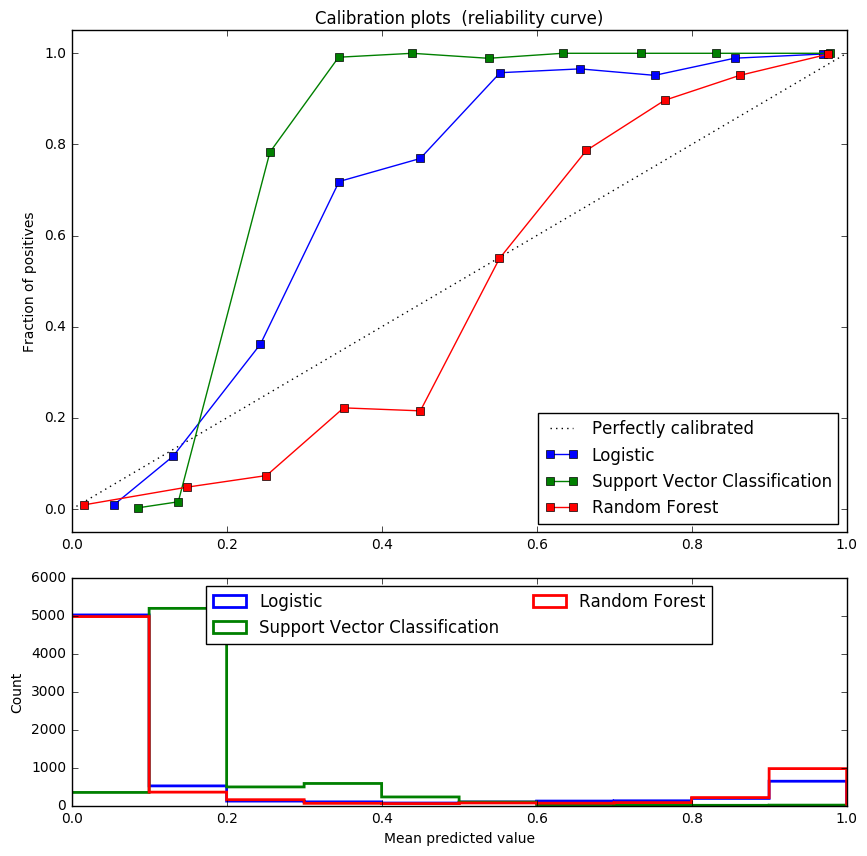

In [53]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, Y_train)
    if hasattr(clf, "predict_proba"):
        print ".....1111"
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        print ".....2222"
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(Y_test, prob_pos, n_bins=10)

    print mean_predicted_value
    print fraction_of_positives
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    print len(prob_pos), prob_pos
    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

#plt.tight_layout()
plt.show()